# CO2 concentration in the atmosphere since 1958
## Author: Kumari Pooja

### Questions need to be addressed
1. Make a plot that shows the superposition of a periodic oscillation and a slower systematic evolution.
2. Separate these two phenomena. Characterize the periodic oscillation. Find a simple model for the slow contribution, estimate its parameters, and attempt an extrapolation until 2025 (for validating the model using future observations).

Importing the necessary libraries

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Reading the weekly data and removing initial comments present in the data in order to use the actual numerical data

In [58]:
url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
CO2_data = pd.read_csv(url, sep='[-,]', engine='python', skiprows=44)
#CO2_data = pd.read_csv(url, sep='[,]', engine='python', skiprows=44)

Seperating the year, months and dates from date that will help later to analyse the data

In [59]:
CO2_data.columns = ["Year", "Month", "Date", "Co2 per mole (ppm)"]
#CO2_data.columns = ["Date", "Co2 per mole (ppm)"]

Checking the data

In [60]:
CO2_data[1:60]

Year  Month  Date  Co2 per mole (ppm)
1   1958      4    12              317.69
2   1958      4    19              317.58
3   1958      4    26              316.48
4   1958      5     3              316.95
5   1958      5    17              317.56
6   1958      5    24              317.99
7   1958      7     5              315.85
8   1958      7    12              315.85
9   1958      7    19              315.46
10  1958      7    26              315.59
11  1958      8     2              315.64
12  1958      8     9              315.10
13  1958      8    16              315.09
14  1958      8    30              314.14
15  1958      9     6              313.54
16  1958     11     8              313.05
17  1958     11    15              313.26
18  1958     11    22              313.57
19  1958     11    29              314.01
20  1958     12     6              314.56
21  1958     12    13              314.41
22  1958     12    20              314.77
23  1958     12    27              315.21
24  1959      1     3              315.24
25  1959      1    10              315.50
26  1959      1    17              315.69
27  1959      1    24              315.86
28  1959      1    31              315.42
29  1959      2    14              316.94
30  1959      2    21              316.61
31  1959      2    28              316.62
32  1959      3     7              316.81
33  1959      3    21              316.73
34  1959      3    28              316.71
35  1959      4     4              317.72
36  1959      4    11              317.12
37  1959      4    18              317.64
38  1959      4    25              318.32
39  1959      5     2              318.27
40  1959      5     9              318.78
41  1959      5    16              318.05
42  1959      5    23              318.43
43  1959      6     6              318.53
44  1959      6    13              318.14
45  1959      6    20              317.88
46  1959      6    27              317.76
47  1959      7     4              316.86
48  1959      7    11              316.83
49  1959      7    18              316.45
50  1959      7    25              316.16
51  1959      8     1              315.62
52  1959      8     8              314.91
53  1959      8    22              315.00
54  1959      8    29              314.15
55  1959      9     5              314.45
56  1959      9    12              313.93
57  1959      9    19              313.57
58  1959      9    26              313.54
59  1959     10     3              313.04

Removing any missing data

In [61]:
CO2_data.dropna()

Year  Month  Date  Co2 per mole (ppm)
0     1958      4     5              317.31
1     1958      4    12              317.69
2     1958      4    19              317.58
3     1958      4    26              316.48
4     1958      5     3              316.95
5     1958      5    17              317.56
6     1958      5    24              317.99
7     1958      7     5              315.85
8     1958      7    12              315.85
9     1958      7    19              315.46
10    1958      7    26              315.59
11    1958      8     2              315.64
12    1958      8     9              315.10
13    1958      8    16              315.09
14    1958      8    30              314.14
15    1958      9     6              313.54
16    1958     11     8              313.05
17    1958     11    15              313.26
18    1958     11    22              313.57
19    1958     11    29              314.01
20    1958     12     6              314.56
21    1958     12    13              314.41
22    1958     12    20              314.77
23    1958     12    27              315.21
24    1959      1     3              315.24
25    1959      1    10              315.50
26    1959      1    17              315.69
27    1959      1    24              315.86
28    1959      1    31              315.42
29    1959      2    14              316.94
...    ...    ...   ...                 ...
3168  2020      5     9              416.99
3169  2020      5    16              416.54
3170  2020      5    23              417.49
3171  2020      5    30              417.19
3172  2020      6     6              416.49
3173  2020      6    13              416.50
3174  2020      6    20              416.11
3175  2020      6    27              415.75
3176  2020      7     4              415.20
3177  2020      7    11              414.91
3178  2020      7    18              414.29
3179  2020      7    25              413.63
3180  2020      8     1              413.42
3181  2020      8     8              412.85
3182  2020      8    15              412.75
3183  2020      8    22              412.25
3184  2020      8    29              411.79
3185  2020      9     5              411.55
3186  2020      9    12              411.45
3187  2020      9    19              411.17
3188  2020      9    26              411.06
3189  2020     10     3              411.08
3190  2020     10    10              411.14
3191  2020     10    17              411.16
3192  2020     10    24              411.54
3193  2020     10    31              411.92
3194  2020     11     7              412.37
3195  2020     11    14              412.67
3196  2020     11    21              412.98
3197  2020     11    28              414.32

[3198 rows x 4 columns]

Showing the superposition of a periodic oscillation and a slower systematic evolution present in the data

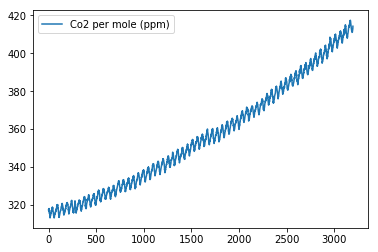

In [62]:
CO2_data.plot(y='Co2 per mole (ppm)')

To show only the slower sytematic evolution, we took the progress of one of the month evolution over the periods from 1958 to 2020

In [63]:
July_Data = CO2_data[CO2_data['Month'] == 7] 

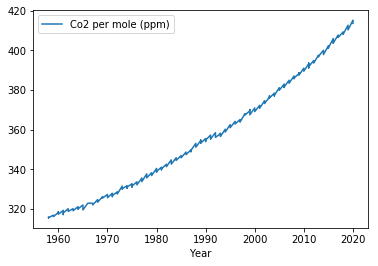

In [64]:
July_Data.plot(x= 'Year', y='Co2 per mole (ppm)')

In [65]:
X = CO2_data[["Year"]]
Y = CO2_data[["Co2 per mole (ppm)"]]

To check only periodic oscillation, the data is analysed on smaller range at multiple interval.

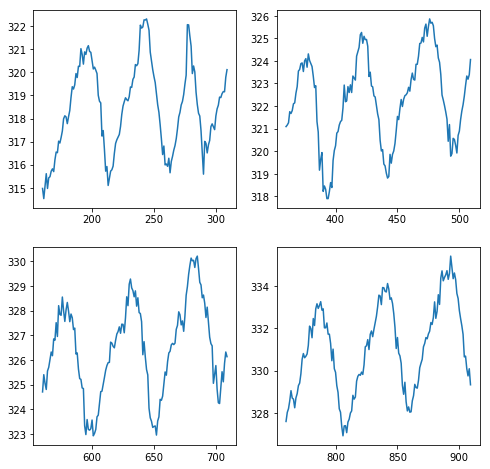

In [66]:
plt.figure(1, figsize=(8, 8))
plt.subplot(221)
plt.plot((Y)[160:310])
plt.subplot(222)
plt.plot((Y)[360:510])
plt.subplot(223)
plt.plot((Y)[560:710])
plt.subplot(224)
plt.plot((Y)[760:910])

In the above 4 graphs, we can observe that on average the oscillation is of period 45-50 (weeks)

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

To find the simple model for the slow contribution, tried to fit a linear model through linear regression

In [68]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
Y_pred = regr.predict(X)

In [70]:
# The Slope
print('Slope: \n', regr.coef_)

# intercept
print('Intercept: \n', regr.intercept_)

print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

Slope: 
 [[1.59170566]]
Intercept: 
 [-2810.4673452]
Mean squared error: 18.49
Coefficient of determination: 0.98


Above results shows the parameter of estimated simple model and the coefficient of determination is also acceptable

Showing the linear estimated model (plotted in blue) for the actual data (denoted in black)

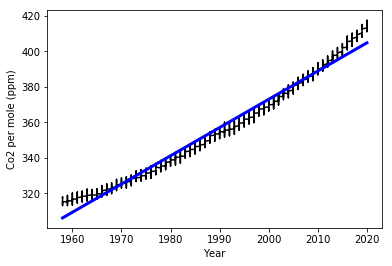

In [71]:
plt.plot(X, Y,  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Co2 per mole (ppm)")
plt.show()

In [72]:
X1 = []
for i in range(2021, 2026):
    for j in range(4):
        X1.append(i)
        
X2 = pd.DataFrame(X1, columns=['Year'])
X_test = X.append(X2)

Predicting the CO2 concentration till 2025 using estimated model

In [73]:
Y_pred1 = regr.predict(X_test)

Showing the extrapolation until 2025 using estimated linear model

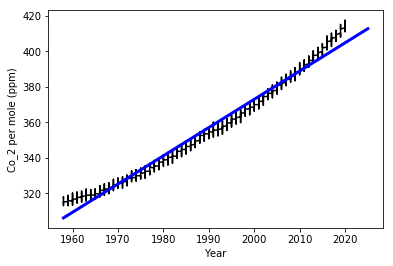

In [74]:
plt.plot(X, Y,  color='black')
plt.plot(X_test, Y_pred1, color='blue', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Co_2 per mole (ppm)")
plt.show()

In the above plot, we can see that it is able to predict for future approximately in correct sense with respect to previous data